In [44]:
# Importing all necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score , mean_squared_error

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import tensorflow as tf
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression , LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB



In [45]:
# Reading the dataset

data = pd.read_csv("athlete_events.csv")
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,570,Pedro Abreu Pascal,M,23.0,200.0,88.0,Cuba,CUB,1980 Summer,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,NaN
1019,571,Rubn Abreu Rivero,M,24.0,177.0,71.0,Venezuela,VEN,1996 Summer,1996,Summer,Atlanta,Cycling,"Cycling Men's Road Race, Individual",NaN
1020,572,Rui Pinto de Abreu,M,15.0,177.0,64.0,Portugal,POR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 400 metres Freestyle,NaN
1021,572,Rui Pinto de Abreu,M,15.0,177.0,64.0,Portugal,POR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,NaN


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1023 non-null   int64  
 1   Name    1023 non-null   object 
 2   Sex     1023 non-null   object 
 3   Age     959 non-null    float64
 4   Height  773 non-null    float64
 5   Weight  776 non-null    float64
 6   Team    1023 non-null   object 
 7   NOC     1023 non-null   object 
 8   Games   1023 non-null   object 
 9   Year    1023 non-null   int64  
 10  Season  1023 non-null   object 
 11  City    1023 non-null   object 
 12  Sport   1023 non-null   object 
 13  Event   1023 non-null   object 
 14  Medal   112 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 120.0+ KB


Exploratory Data Analysis

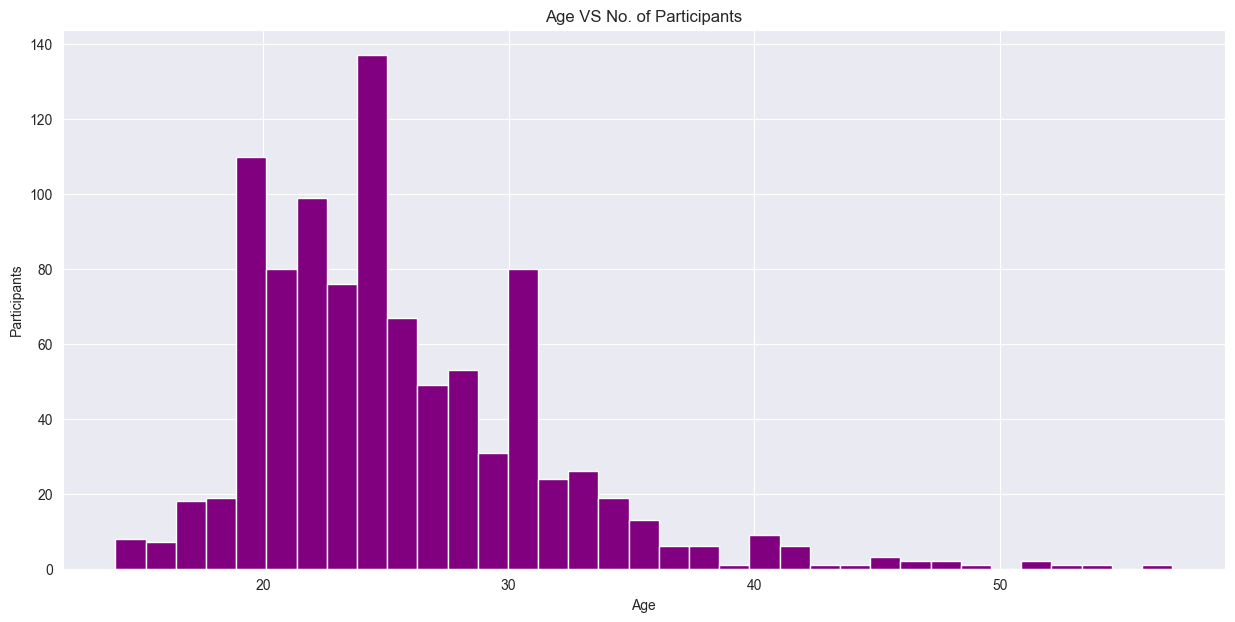

In [47]:
# Age Distribution 

plt.figure(figsize = (15 , 7))
plt.title("Age VS No. of Participants")
plt.hist(data.Age,color='purple', bins = 35)
plt.xlabel("Age")
plt.ylabel("Participants")
plt.show()

In [48]:
! pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
# Age to participant distribution

age_dist = data.Age.value_counts().sort_values(ascending=False).head(15)
age_dist

Age
22.0    99
21.0    80
23.0    76
24.0    75
19.0    68
26.0    67
25.0    62
28.0    53
27.0    49
30.0    45
20.0    42
31.0    35
29.0    31
33.0    26
32.0    24
Name: count, dtype: int64

In [50]:
# Gender Distribution 
gender_unique_values = data.Sex.value_counts()
gender_unique_values

Sex
M    857
F    166
Name: count, dtype: int64

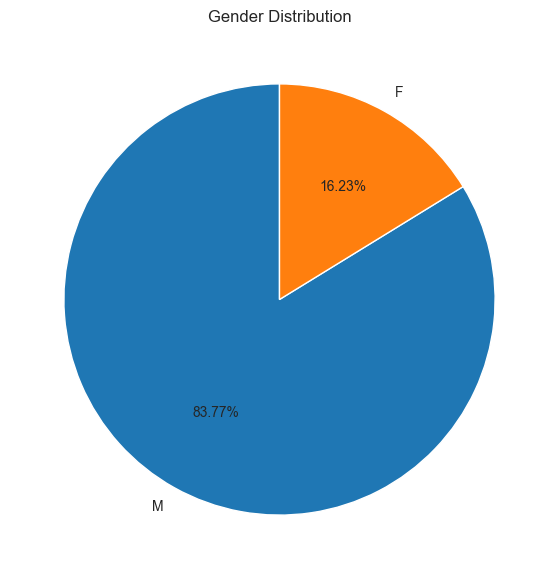

In [51]:
plt.figure(figsize=(15 , 7))
plt.title("Gender Distribution")
plt.pie(gender_unique_values , labels=gender_unique_values.index,autopct="%.2f%%", startangle=90)
plt.show()


In [52]:
# Seeing female participants in each year in summer season
female_part = data[(data.Sex == 'F') & (data.Season == 'Summer')][['Sex' , 'Year']]
female_part = female_part.groupby('Year').count().reset_index()
female_part


,Year,Sex
0,1900,2
1,1932,2
2,1948,1
3,1956,2
4,1960,5
5,1964,1
6,1972,6
7,1976,1
8,1980,3
9,1984,7


Text(0, 0.5, 'Female Participants')

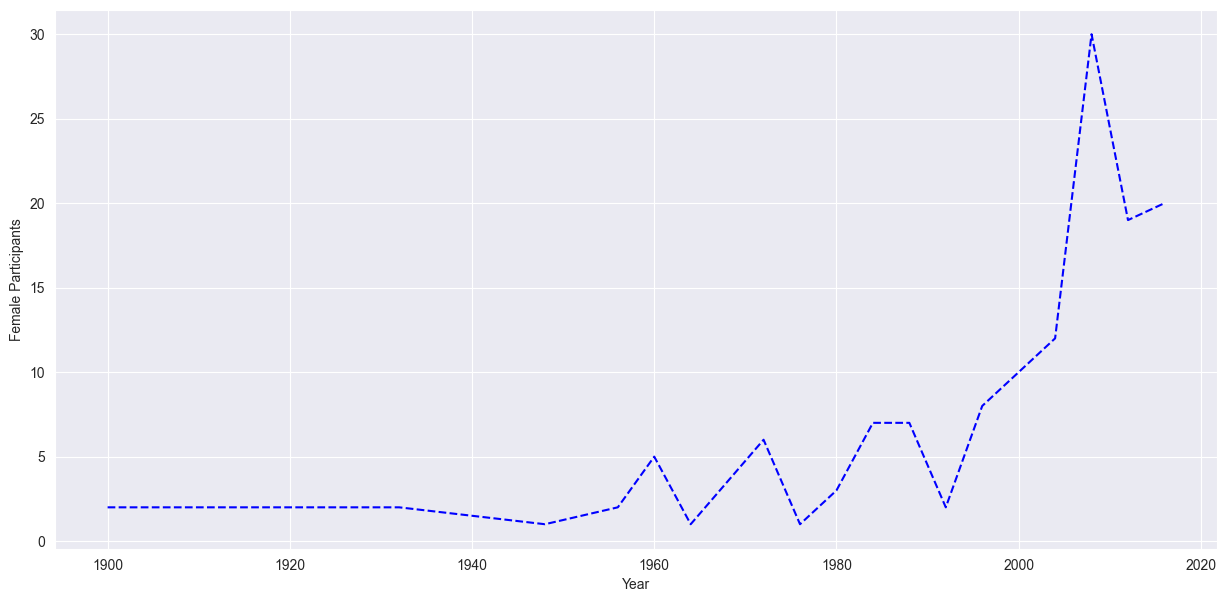

In [53]:
# Visualizing the female participant data 

plt.figure(figsize=(15 , 7))
sns.lineplot(data = female_part , x = 'Year' , y = 'Sex', linestyle = '--' , color = 'blue')
plt.xlabel('Year')
plt.ylabel('Female Participants')


In [54]:
# Participants across the season 
seasons = data.Season.value_counts()
seasons

Season
Summer    874
Winter    149
Name: count, dtype: int64

In [55]:
# Top 15 Countries participating in Olmypics by no. of participants
top_countries = data.Team.value_counts().sort_values(ascending=False).head(15)
top_countries 

Team
Egypt                   189
Norway                   59
United States            41
Finland                  34
Spain                    27
Japan                    27
Iraq                     25
Russia                   24
Italy                    21
United Arab Republic     21
Sweden                   19
Netherlands              19
Portugal                 18
Great Britain            17
Canada                   17
Name: count, dtype: int64

<Axes: title={'center': 'Top 15 Countries Total Participations'}, xlabel='Team', ylabel='count'>

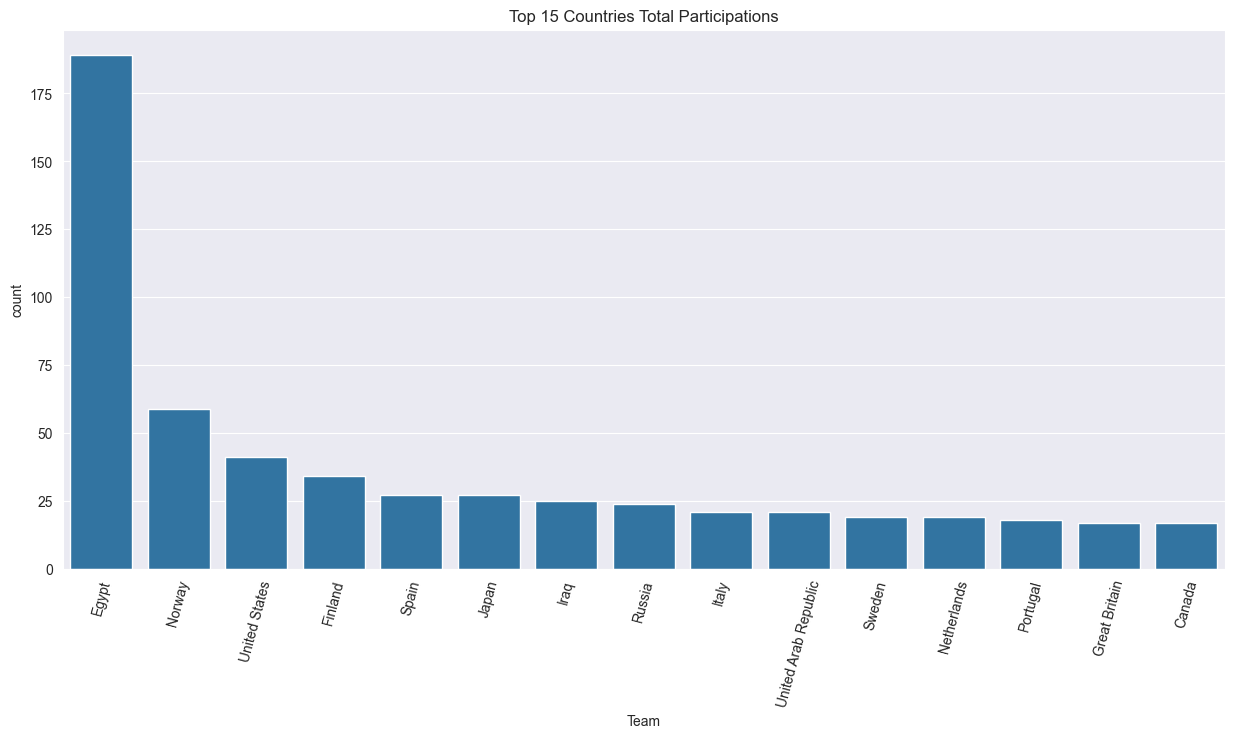

In [56]:
# data visualization of countries participating 
sns.set_style('darkgrid')
plt.figure(figsize=(15 , 7))
plt.title('Top 15 Countries Total Participations')
plt.xticks(rotation = 75)
sns.barplot(x = top_countries.index , y = top_countries)

In [57]:
# Data of countries with most Gold Medals

max_year_country = data[(data.Medal == 'Gold')].Team
max_year_country = max_year_country.value_counts().head(20)
max_year_country

Team
Norway              7
Italy               7
France              4
United States       4
Spain               3
Finland             3
Vesper Boat Club    2
Denmark/Sweden      1
Unified Team        1
Hungary             1
Bulgaria            1
Ethiopia            1
Canada              1
Japan               1
Soviet Union        1
Azerbaijan          1
Uzbekistan          1
Pakistan            1
Cameroon            1
Belarus             1
Name: count, dtype: int64

Text(0.5, 0, 'Top 20 Gold Medal Won Countrywise')

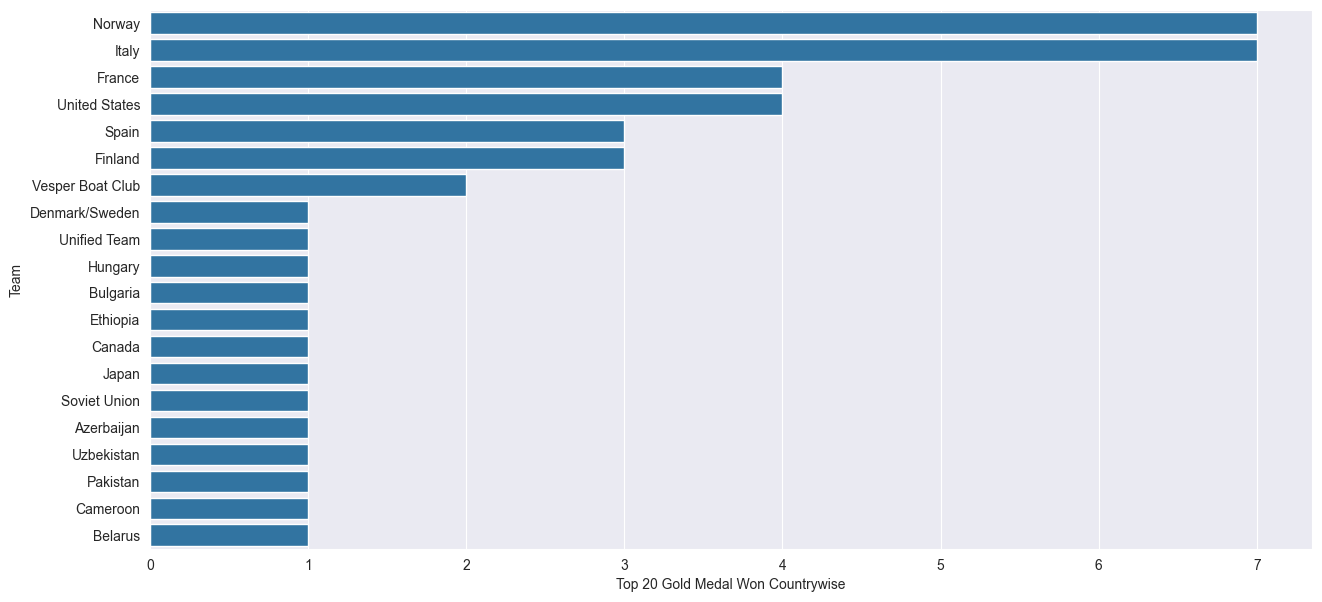

In [58]:
# Visualizong the countries with most Gold Medals

plt.figure(figsize=(15 , 7))
sns.barplot(x = max_year_country , y = max_year_country.index)
plt.xlabel("Top 20 Gold Medal Won Countrywise")

Text(0, 0.5, 'Height')

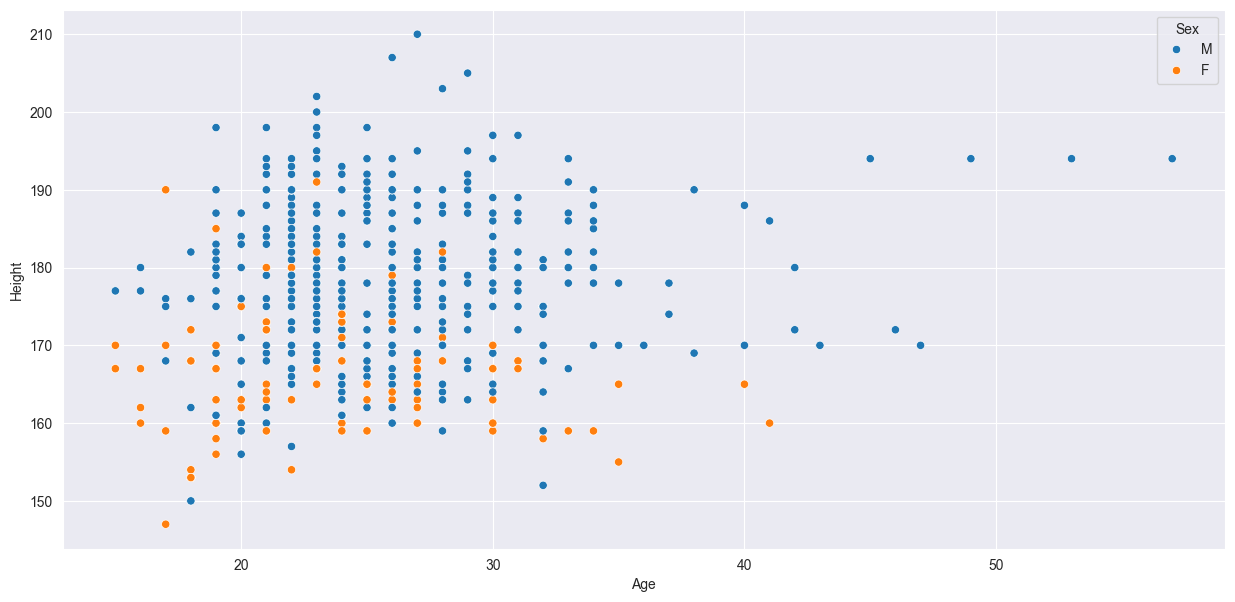

In [59]:
# Age vs Height Spread
age_heig = data[(data.Age != 0) & (data.Height != 0.0) & (data.Medal != 'None') & (data.Season == 'Summer')]
plt.figure(figsize=(15,7))
sns.scatterplot(x=age_heig.Age, y=age_heig.Height, data=age_heig, hue='Sex')
plt.xlabel('Age')
plt.ylabel('Height')

Data Cleaning 

In [60]:
# To fill missing values in Medal column with 0's and 1's 

data['Medal'] = data['Medal'].apply(lambda x : 1 if str(x) != 'nan' else 0)
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,570,Pedro Abreu Pascal,M,23.0,200.0,88.0,Cuba,CUB,1980 Summer,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,0
1019,571,Rubn Abreu Rivero,M,24.0,177.0,71.0,Venezuela,VEN,1996 Summer,1996,Summer,Atlanta,Cycling,"Cycling Men's Road Race, Individual",0
1020,572,Rui Pinto de Abreu,M,15.0,177.0,64.0,Portugal,POR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 400 metres Freestyle,0
1021,572,Rui Pinto de Abreu,M,15.0,177.0,64.0,Portugal,POR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,0


In [61]:
# Drop the uncessary feature columns

data = data.drop(['ID' , 'Name' , 'Games'] , axis = 1)

In [62]:
# Checking null values in the data 

data.isna().mean()

Sex       0.000000
Age       0.062561
Height    0.244379
Weight    0.241447
Team      0.000000
NOC       0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.000000
dtype: float64

In [63]:
data.groupby(['Medal', 'Sex']).mean(numeric_only=True).astype(int)

Age  Height  Weight  Year
Medal Sex                           
0     F     23     166      60  1997
      M     25     177      73  1980
1     F     21     169      60  1989
      M     25     179      79  1974

In [64]:
# Fill null values with mean values for these columns 
for column in ['Age' , 'Height' , 'Weight']:
    data[column] = data.groupby(['Medal', 'Sex'])[column].transform(lambda x: x.fillna(x.mean()).astype(int))

In [65]:
# Checking null values again 
print("Total missing values:" , data.isna().sum())

Total missing values: Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


In [66]:
data

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,M,24,180,80,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,M,23,170,60,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,M,24,177,73,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,M,34,179,79,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,F,21,185,82,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1018,M,23,200,88,Cuba,CUB,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,0
1019,M,24,177,71,Venezuela,VEN,1996,Summer,Atlanta,Cycling,"Cycling Men's Road Race, Individual",0
1020,M,15,177,64,Portugal,POR,1976,Summer,Montreal,Swimming,Swimming Men's 400 metres Freestyle,0
1021,M,15,177,64,Portugal,POR,1976,Summer,Montreal,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,0


In [67]:
# Checking no. of unique values in the column 
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}


{'Sex': 2,
 'Team': 115,
 'NOC': 106,
 'Season': 2,
 'City': 41,
 'Sport': 47,
 'Event': 272}

In [68]:
# Defining function for encoding techniques

def binary_encode(df , columns  , positive_values):
    df = df.copy()
    for column , positive_value in zip(columns , positive_values):
        df[column] = df[column].apply(lambda x : 1 if x == positive_value else 0)
    return df   

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df 


data = binary_encode(
    data , 
    columns = ['Sex' , 'Season'] , 
    positive_values = ['M' , 'Summer']
)

data = onehot_encode(
    data , 
    columns = ['Team' , 'NOC' , 'City' , 'Sport' , 'Event'] , 
    prefixes = ['T' , 'N' , 'C' , 'S' , 'E']
)

In [69]:
data 

,Sex,Age,Height,Weight,Year,Season,Medal,T_Afghanistan,T_Algeria,T_Angola,...,"E_Wrestling Men's Light-Heavyweight, Freestyle","E_Wrestling Men's Light-Heavyweight, Greco-Roman","E_Wrestling Men's Lightweight, Freestyle","E_Wrestling Men's Lightweight, Greco-Roman","E_Wrestling Men's Middleweight A, Greco-Roman","E_Wrestling Men's Middleweight, Freestyle","E_Wrestling Men's Middleweight, Greco-Roman","E_Wrestling Men's Super-Heavyweight, Greco-Roman","E_Wrestling Men's Welterweight, Freestyle","E_Wrestling Men's Welterweight, Greco-Roman"
0,1,24,180,80,1992,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,23,170,60,2012,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,24,177,73,1920,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,34,179,79,1900,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,21,185,82,1988,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1,23,200,88,1980,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1019,1,24,177,71,1996,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1020,1,15,177,64,1976,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1021,1,15,177,64,1976,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [70]:
print(data.columns)


Index(['Sex', 'Age', 'Height', 'Weight', 'Year', 'Season', 'Medal',
       'T_Afghanistan', 'T_Algeria', 'T_Angola',
       ...
       'E_Wrestling Men's Light-Heavyweight, Freestyle',
       'E_Wrestling Men's Light-Heavyweight, Greco-Roman',
       'E_Wrestling Men's Lightweight, Freestyle',
       'E_Wrestling Men's Lightweight, Greco-Roman',
       'E_Wrestling Men's Middleweight A, Greco-Roman',
       'E_Wrestling Men's Middleweight, Freestyle',
       'E_Wrestling Men's Middleweight, Greco-Roman',
       'E_Wrestling Men's Super-Heavyweight, Greco-Roman',
       'E_Wrestling Men's Welterweight, Freestyle',
       'E_Wrestling Men's Welterweight, Greco-Roman'],
      dtype='object', length=588)


In [71]:
# Splitting data in target column and features columns 
y = data['Medal']
X = data.drop('Medal' , axis = 1) 

Feature Selection 

In [72]:
best = SelectKBest(score_func=chi2 , k = 10)

In [73]:
fit  =  best.fit(X , y)

In [74]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [75]:
# Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

                                             Feature      Score
3                                             Weight  37.606077
56                                           T_Italy  36.976169
172                                            N_ITA  36.976169
476                       E_Rowing Men's Coxed Pairs  33.664149
49                                         T_Hungary  32.245193
164                                            N_HUN  32.245193
319                    E_Alpine Skiing Men's Super G  24.453160
449  E_Gymnastics Men's Team All-Around, Free System  24.401786
298                                         S_Rowing  22.201309
35                                           T_Egypt  21.044390
148                                            N_EGY  21.044390


In [76]:
# Select 10 best features from the dataset

features = scores["Feature"].to_list()[:10]
features

['Sex',
 'Age',
 'Height',
 'Weight',
 'Year',
 'Season',
 'T_Afghanistan',
 'T_Algeria',
 'T_Angola',
 'T_Argentina']

Making a new dataset using the above selected features

In [77]:
data = data[['Sex',
 'Age',
 'Height',
 'Weight',
 'Year',
 'Season',
 'T_Afghanistan',
 'T_Algeria',
 'T_Angola',
 'T_Argentina' , 'Medal']]

data.head()

,Sex,Age,Height,Weight,Year,Season,T_Afghanistan,T_Algeria,T_Angola,T_Argentina,Medal
0,1,24,180,80,1992,1,False,False,False,False,0
1,1,23,170,60,2012,1,False,False,False,False,0
2,1,24,177,73,1920,1,False,False,False,False,0
3,1,34,179,79,1900,1,False,False,False,False,1
4,0,21,185,82,1988,0,False,False,False,False,0


In [78]:
y = data['Medal']
X = data.drop(['Medal'] , axis = 1)

# Split data into training and testing data 
train_x , test_x , train_y , test_y = train_test_split(X , y , test_size = 0.4 , random_state = 1) 

Feature Scaling 

In [79]:
# Scaling data 
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

Model Evaluation

In [80]:
# 1. Logistic Regression
LR = LogisticRegression()
LR.fit(train_x , train_y)
LR_predict = LR.predict(test_x)
LR_acc_score = accuracy_score(test_y , LR_predict)
print("Accuracy of Logistic Regression:" , LR_acc_score  * 100)


Accuracy of Logistic Regression: 87.5609756097561


In [81]:
# 2 . Decision Tree
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=10,max_depth = 30)
dt.fit(train_x , train_y)
dt_predicted = dt.predict(test_x)
dt_acc_score = accuracy_score(test_y , dt_predicted)
print("Accuracy of DecisionTreeClassifier: " , dt_acc_score * 100)

Accuracy of DecisionTreeClassifier:  87.5609756097561


In [82]:
# Using Cross-Validation
cv_scores = cross_val_score(DecisionTreeClassifier(random_state=10), train_x, train_y, cv=5)
print("Cross-validation scores:", cv_scores)

# Finding the Score for the Cross Validation
print("Mean cross-validation score:", cv_scores.mean() * 100)

Cross-validation scores: [0.8699187  0.85365854 0.88617886 0.8442623  0.85245902]
Mean cross-validation score: 86.12954818072771


In [83]:

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth':[10 , 20 , 30 , 40] , 
    'min_samples_split':[2 , 5 , 10] , 
    'min_samples_leaf':[1 , 2 , 4] , 
    'max_features':['sqrt' , 'log2' , 'None'] , 
    'criterion':['gini' , 'entropy'], 
    'max_leaf_nodes':[None , 10 , 20 , 30]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=10) , param_grid , cv = 5)
grid_search.fit(train_x , train_y)

print("Accuracy of Decision Tree after Hyperparameter Tuning :", grid_search.best_score_ * 100)

Accuracy of Decision Tree after Hyperparameter Tuning : 91.02892176462748


c:\Users\chatt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1440 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\chatt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\chatt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\chatt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\b

In [84]:
# 3. Random Forest
rf = RandomForestClassifier(n_estimators=200 , random_state = 10 , max_depth = 15)
rf.fit(train_x , train_y)
rf_predicted = rf.predict(test_x)
rf_acc_score = accuracy_score(test_y , rf_predicted)
print("Accuracy of Random Forest:" , rf_acc_score * 100)

Accuracy of Random Forest: 89.26829268292683


In [85]:
from sklearn.model_selection import RandomizedSearchCV

randomized_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=10),
    param_distributions=param_grid,
    n_iter=100,  
    cv=5,
    scoring='accuracy',
    random_state=10,
    n_jobs=-1  
)

randomized_search.fit(train_x, train_y)
print("Accuracy after RandomizedSearchCV:", randomized_search.best_score_ * 100)


c:\Users\chatt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
190 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
61 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\chatt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\chatt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\chatt\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.

Accuracy after RandomizedSearchCV: 91.84726109556178


In [86]:
# 4. Gradient Boosting 
gvc = GradientBoostingClassifier()
gvc.fit(train_x , train_y)
gvc_predicted = gvc.predict(test_x)
gvc_acc_score = accuracy_score(test_y , gvc_predicted)
print("Accuracy of Gradient Boosting Classifier:" , gvc_acc_score * 100)


Accuracy of Gradient Boosting Classifier: 88.53658536585365


In [87]:
# 5. Support Vector Machine
from sklearn.svm import SVC

svc = SVC(kernel='rbf' , C = 1.0 , gamma='scale' , random_state = 10)

svc.fit(train_x , train_y)
svc_predicted = svc.predict(test_x)
svc_acc_score = accuracy_score(test_y , svc_predicted)
print("Accuracy of Support Vector Classifier: " ,  gvc_acc_score * 100)


Accuracy of Support Vector Classifier:  88.53658536585365


In [88]:
#Hyperparameter tuning for support vector machine 
param_grid = {
    'C': [1, 10, 100],  
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 0.1, 1],  
}


grid_search = GridSearchCV(estimator=SVC(random_state=42) , 
                           param_grid=param_grid , 
                           cv =3 , 
                           scoring='accuracy' , 
                           n_jobs=-1)

grid_search.fit(train_x , train_y)
print("Accuracy of SVC after Hyperparameter Tuning :", grid_search.best_score_ * 100)

            

Accuracy of SVC after Hyperparameter Tuning : 90.04941814124024


Final Random Forest Classifier Model

In [92]:
# Deciding the algorithm to use 

rf = RandomForestClassifier(n_estimators=200 , random_state = 10 , max_depth = 15)
rf.fit(train_x , train_y)
rf_predicted = rf.predict(test_x)
rf_acc_score = accuracy_score(test_y , rf_predicted)

from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

randomized_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=10),
    param_distributions=param_grid,
    n_iter=100,  
    cv=5,
    scoring='accuracy',
    random_state=10,
    n_jobs=-1  
)

randomized_search.fit(train_x, train_y)
print("Accuracy after RandomizedSearchCV:", randomized_search.best_score_ * 100)




Accuracy after RandomizedSearchCV: 92.1724643475943
